# Swim in Rising Water

You are given an n x n integer matrix grid where each value grid[i][j] represents the elevation at that point (i, j).

The rain starts to fall. At time t, the depth of the water everywhere is t. You can swim from a square to another 4-directionally adjacent square if and only if the elevation of both squares individually are at most t. You can swim infinite distances in zero time. Of course, you must stay within the boundaries of the grid during your swim.

Return the least time until you can reach the bottom right square (n - 1, n - 1) if you start at the top left square (0, 0).

 

**Example 1:**

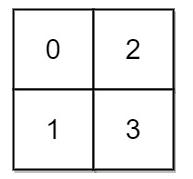

Input: grid = [[0,2],[1,3]]
Output: 3
Explanation:
At time 0, you are in grid location (0, 0).
You cannot go anywhere else because 4-directionally adjacent neighbors have a higher elevation than t = 0.
You cannot reach point (1, 1) until time 3.
When the depth of water is 3, we can swim anywhere inside the grid.

**Example 2:**

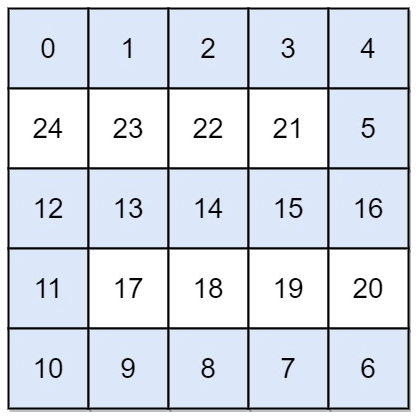

Input: grid = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
Output: 16
Explanation: The final route is shown.
We need to wait until time 16 so that (0, 0) and (4, 4) are connected.
 

**Constraints:**

- n == grid.length
- n == grid[i].length
- 1 <= n <= 50
- 0 <= grid[i][j] < n2
- Each value grid[i][j] is unique.

In [1]:
from collections import deque

def canReach(grid, time):
    n = len(grid)
    visited = set()
    queue = deque([(0, 0)])
    
    while queue:
        x, y = queue.popleft()
        if x == y == n - 1:
            return True
        
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and (nx, ny) not in visited and grid[nx][ny] <= time:
                visited.add((nx, ny))
                queue.append((nx, ny))
    
    return False

def leastTimeToReachBottomRight(grid):
    n = len(grid)
    left, right = 0, n * n - 1
    
    while left < right:
        mid = (left + right) // 2
        if canReach(grid, mid):
            right = mid
        else:
            left = mid + 1
    
    return left

# Example usage:
grid1 = [[0, 2], [1, 3]]
print(leastTimeToReachBottomRight(grid1))  # Output: 3

grid2 = [[0, 1, 2, 3, 4], [24, 23, 22, 21, 5], [12, 13, 14, 15, 16], [11, 17, 18, 19, 20], [10, 9, 8, 7, 6]]
print(leastTimeToReachBottomRight(grid2))  # Output: 16

3
16
